In [17]:
# all imports will be in this cell 

import pandas as pd
import string
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
porter_stemmer=PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\George\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\George\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
data=pd.read_csv("dataset_test_investing_crypto.csv", encoding="ISO-8859-1", sep=';', header=0)
data

,CLASSES,TEXT
0,GOOD,While P2E gaming platforms combine the metaver...
1,BAD,Ethereum's co-founder Gavin Wood said cryptoc...
2,GOOD,Binance Coins (BNB) price posted 1.63% gains ...
3,BAD,Digital asset investment products saw $141 mil...
4,BAD,Cardano was trading at $0.4936 by 10:11 (14:1...
...,...,...
262,GOOD,"In its first major financing round, Ethereum s..."
263,GOOD,Cryptocurrencies traded in the green early tod...
264,GOOD,One of the methods through which the governmen...
265,GOOD,Cryptocurrencies traded in the green early on ...


In [19]:
# helper functions - all helper functions will be reported here

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

def tokenization(text):
    tokens = re.split('W+', text)
    return tokens

def remove_stopwords(text):
    output= [i for i in text if not i in stopwords]
    return output

def stemming(text):
    stem_text=[porter_stemmer.stem(word) for word in text]
    return stem_text

def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

In [20]:
# data preprocess

# remove punctuation from Text column - create a new column 
data['clean_msg']=data['TEXT'].apply(lambda x:remove_punctuation(x))

# lower all letters - create a new column 
data['msg_lower']=data['clean_msg'].apply(lambda x: x.lower())

import gensim
data['no_stopwords']=data['msg_lower'].apply(gensim.utils.simple_preprocess)

# tokenize all rows - create a new column 
#data['msg_tokenied']= data['msg_lower'].apply(lambda x: tokenization(x))

# remove stopwords - create a new column
data['no_stopwords2']=data['no_stopwords'].apply(lambda x:remove_stopwords(x))

# stemme texts - create a new column
data['msg_stemmed']=data['no_stopwords2'].apply(lambda x:stemming(x))

# lemmatize texts - create a new column
data['msg_lemmatized']=data['msg_stemmed'].apply(lambda x:lemmatizer(x))

data['msg_lemmatized_string']=data['msg_lemmatized'].apply(lambda x: ' '.join(map(str, x)))

data.head()

,CLASSES,TEXT,clean_msg,msg_lower,no_stopwords,no_stopwords2,msg_stemmed,msg_lemmatized,msg_lemmatized_string
0,GOOD,While P2E gaming platforms combine the metaver...,While P2E gaming platforms combine the metaver...,while p2e gaming platforms combine the metaver...,"[while, gaming, platforms, combine, the, metav...","[gaming, platforms, combine, metaverse, web, o...","[game, platform, combin, metavers, web, offer,...","[game, platform, combin, metavers, web, offer,...",game platform combin metavers web offer medium...
1,BAD,Ethereum's co-founder Gavin Wood said cryptoc...,Ethereums cofounder Gavin Wood said cryptocur...,ethereums cofounder gavin wood said cryptocur...,"[ethereums, cofounder, gavin, wood, said, cryp...","[ethereums, cofounder, gavin, wood, said, cryp...","[ethereum, cofound, gavin, wood, said, cryptoc...","[ethereum, cofound, gavin, wood, said, cryptoc...",ethereum cofound gavin wood said cryptocurr in...
2,GOOD,Binance Coins (BNB) price posted 1.63% gains ...,Binance Coins BNB price posted 163 gains in t...,binance coins bnb price posted 163 gains in t...,"[binance, coin, bnb, price, posted, gains, in,...","[binance, coin, bnb, price, posted, gains, las...","[binanc, coin, bnb, price, post, gain, last, h...","[binanc, coin, bnb, price, post, gain, last, h...",binanc coin bnb price post gain last hour take...
3,BAD,Digital asset investment products saw $141 mil...,Digital asset investment products saw 141 mill...,digital asset investment products saw 141 mill...,"[digital, asset, investment, products, saw, mi...","[digital, asset, investment, products, saw, mi...","[digit, asset, invest, product, saw, million, ...","[digit, asset, invest, product, saw, million, ...",digit asset invest product saw million outflow...
4,BAD,Cardano was trading at $0.4936 by 10:11 (14:1...,Cardano was trading at 04936 by 1011 1411 GMT...,cardano was trading at 04936 by 1011 1411 gmt...,"[cardano, was, trading, at, by, gmt, on, the, ...","[cardano, trading, gmt, investingcom, index, t...","[cardano, trade, gmt, investingcom, index, tue...","[cardano, trade, gmt, investingcom, index, tue...",cardano trade gmt investingcom index tuesday d...


In [21]:
#  Data analysis 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [22]:
v = CountVectorizer()
X = v.fit_transform(data['msg_lemmatized_string']).todense()
y = data['CLASSES'].to_list()
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
# split dataset

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.25,random_state=4)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['GOOD', 'BAD', 'BAD', 'BAD', 'GOOD', 'NEUTRAL', 'NEUTRAL', 'BAD', 'NEUTRAL', 'BAD', 'NEUTRAL', 'NEUTRAL', 'BAD', 'NEUTRAL', 'GOOD', 'BAD', 'BAD', 'BAD', 'BAD', 'GOOD', 'NEUTRAL', 'GOOD', 'GOOD', 'NEUTRAL', 'GOOD', 'NEUTRAL', 'GOOD', 'GOOD', 'NEUTRAL', 'GOOD', 'BAD', 'NEUTRAL', 'GOOD', 'NEUTRAL', 'BAD', 'NEUTRAL', 'NEUTRAL', 'BAD', 'BAD', 'BAD', 'GOOD', 'GOOD', 'GOOD', 'NEUTRAL', 'BAD', 'BAD', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'GOOD', 'GOOD', 'NEUTRAL', 'BAD', 'NEUTRAL', 'BAD', 'BAD', 'NEUTRAL', 'NEUTRAL', 'NEUTRAL', 'BAD', 'BAD', 'GOOD', 'GOOD', 'BAD', 'BAD', 'BAD', 'GOOD', 'BAD', 'BAD', 'BAD', 'BAD', 'BAD', 'GOOD', 'BAD', 'BAD', 'GOOD', 'GOOD', 'NEUTRAL', 'BAD', 'NEUTRAL', 'NEUTRAL', 'BAD', 'BAD', 'GOOD', 'GOOD', 'BAD', 'NEUTRAL', 'NEUTRAL', 'GOOD',

Accuracy of GNB classifier on training set: 0.98
Accuracy of GNB classifier on test set: 0.51
F1-Score: 0.506
Precision: 0.512
Recall: 0.507


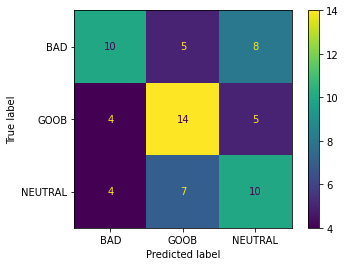

In [24]:
gnb = GaussianNB().fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))
# Scores
print('F1-Score: %.3f'%f1_score(y_test, y_pred, average="weighted"))
print('Precision: %.3f'%precision_score(y_test, y_pred, average="weighted"))
print('Recall: %.3f'%recall_score(y_test, y_pred, average="weighted"))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(conf_mat, display_labels=['BAD', 'GOOB', 'NEUTRAL'])
cmd.plot()

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
param_dist={
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [27]:
grid=GridSearchCV(gnb,param_grid=param_dist,cv=5,verbose=1,n_jobs=-1)

In [28]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [29]:
grid.best_estimator_

GaussianNB(var_smoothing=0.01873817422860384)

In [30]:
grid.best_score_

0.595

In [31]:
gnb = GaussianNB(var_smoothing=4.328761281083062e-05)

In [32]:
scoring = ['accuracy','f1_macro','precision_macro', 'recall_macro']
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scores = cross_validate(gnb, X, y, cv=5,scoring=scoring)
scores

{'fit_time': array([0.03788996, 0.01296353, 0.01117587, 0.0101738 , 0.01119709]),
 'score_time': array([0.01096773, 0.00620532, 0.00620151, 0.0061357 , 0.00598431]),
 'test_accuracy': array([0.48148148, 0.5       , 0.56603774, 0.54716981, 0.50943396]),
 'test_f1_macro': array([0.47612035, 0.50068838, 0.54857756, 0.52567694, 0.47789725]),
 'test_precision_macro': array([0.4754386 , 0.52048768, 0.560169  , 0.52206702, 0.47802198]),
 'test_recall_macro': array([0.47827084, 0.50588235, 0.55318627, 0.5376677 , 0.49638803])}